In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random as random
import numpy as np

In [37]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]

In [38]:
print(len(x_data))
print(len(y_data))

10
10


### visualize all data points

#### use linear regression to fit the data

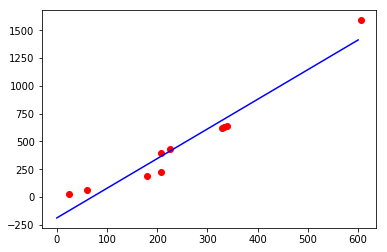

In [50]:
plt.plot(x_data, y_data, 'ro')
best_w = 2.67
best_b = -188.4
x_ = np.linspace(0,600,100)
y_ = best_w * x_ + best_b
plt.plot(x_, y_, 'b-')

1000
100
(100, 1000)
(100, 1000)


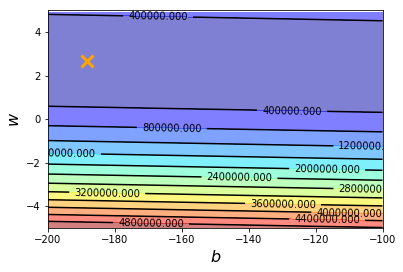

In [61]:
x = np.arange(-200,-100,0.1) #different bias
y = np.arange(-5,5,0.1) #different weight
print(len(x))
print(len(y))
#Z =  np.zeros((len(y), len(x))) # the loss function values for different biases and weights
X, Y = np.meshgrid(x, y)
print(X.shape)
print(Y.shape)

def loss(bias, weight):
    """ calculate the loss for the data set with given weight and bias
    """
    mean_loss = 0
    for n in range(len(x_data)):
            mean_loss = mean_loss +  (y_data[n] - bias - weight*x_data[n])**2
    return mean_loss/len(x_data)
            

        
plt.contourf(X,Y,loss(X,Y), 12, alpha=0.5, cmap=plt.get_cmap('jet'))
C = plt.contour(X,Y,loss(X,Y), 12, colors='black')
plt.clabel(C, inline=True)
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

In [96]:
# ydata = b + w * xdata
b = -120 # initial b
w = -5 # initial w
lr = 1 # learning rate, try different lr to see its effect
iteration = 100000

# store initial values for plotting.
b_history = [b]
w_history = [w]

# using AdamGrad
lr_b = 0
lr_w = 0

# Iterations
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0 *(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0 *(y_data[n] - b - w*x_data[n])*x_data[n]
    
    # adam grad
    lr_b = lr_b + b_grad **2
    lr_w = lr_w + w_grad **2
    # Update parameters
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

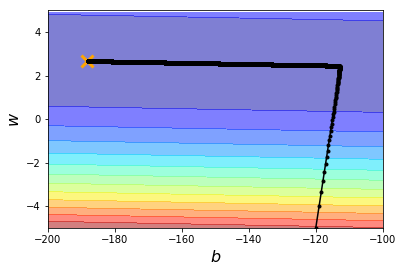

In [97]:

# plot the figure
plt.contourf(X,Y,loss(X,Y), 12, alpha=0.5, cmap=plt.get_cmap('jet'))
#plt.contour(X,Y,loss(X,Y), 12, colors='black')
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()